In [ ]:
import torch
from torchsummary import summary
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P4


In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# Data Loading and Preprocessing

In [ ]:
PATH_TO_NPZ = "./drive/MyDrive/CS512_Project/data/dump/Data_All_High.npz"
loaded_data = np.load(PATH_TO_NPZ)
print(loaded_data.files)

['train_x', 'train_y', 'val_x', 'val_y', 'test_x', 'test_y']


In [ ]:
train_x = loaded_data['train_x'].astype('float32')
train_y = loaded_data['train_y'].astype('float32')
val_x = loaded_data['val_x'].astype('float32')
val_y = loaded_data['val_y'].astype('float32')
test_x = loaded_data['test_x'].astype('float32')
test_y = loaded_data['test_y'].astype('float32')

print("Training set :", train_x.shape, train_y.shape)
print("Validation set :", val_x.shape, val_y.shape)
print("Test set :", test_x.shape, test_y.shape)

Training set : (10718, 112, 112, 3) (10718, 112, 112, 3)
Validation set : (1191, 112, 112, 3) (1191, 112, 112, 3)
Test set : (1324, 112, 112, 3) (1324, 112, 112, 3)


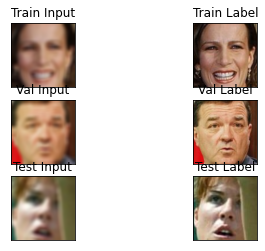

In [ ]:
plt.subplot(321), plt.imshow(train_x[0].astype('int')), plt.title("Train Input"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(train_y[0].astype('int')), plt.title("Train Label"), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(val_x[0].astype('int')), plt.title("Val Input"), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(val_y[0].astype('int')), plt.title("Val Label"), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(test_x[0].astype('int')), plt.title("Test Input"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(test_y[0].astype('int')), plt.title("Test Label"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
del loaded_data

In [ ]:
# Normalizing Images
for i in range(len(train_x)):
    train_x[i] = (train_x[i] - np.mean(train_x[i]))/255.0
    train_y[i] = (train_y[i] - np.mean(train_y[i]))/255.0

for i in range(len(val_x)):
    val_x[i] = (val_x[i] - np.mean(val_x[i]))/255.0
    val_y[i] = (val_y[i] - np.mean(val_y[i]))/255.0

for i in range(len(test_x)):
    test_x[i] = (test_x[i] - np.mean(test_x[i]))/255.0
    test_y[i] = (test_y[i] - np.mean(test_y[i]))/255.0

In [ ]:
np.min(train_x), np.max(train_x) , np.min(train_y), np.max(train_y)

(-0.7484246, 0.7337733, -0.78723085, 0.7925307)

In [ ]:
# Converting images from HxWxC format to CxHxW format
train_x = np.moveaxis(train_x, -1, 1)
train_y = np.moveaxis(train_y, -1, 1)
val_x = np.moveaxis(val_x, -1, 1)
val_y = np.moveaxis(val_y, -1, 1)
test_x = np.moveaxis(test_x, -1, 1)
test_y = np.moveaxis(test_y, -1, 1)
print("Training set :", train_x.shape, train_y.shape)
print("Validation set :", val_x.shape, val_y.shape)
print("Test set :", test_x.shape, test_y.shape)

Training set : (10718, 3, 112, 112) (10718, 3, 112, 112)
Validation set : (1191, 3, 112, 112) (1191, 3, 112, 112)
Test set : (1324, 3, 112, 112) (1324, 3, 112, 112)


In [ ]:
import gc
gc.collect()

9149

In [ ]:
train_x = torch.tensor(train_x, dtype=torch.float)
train_y = torch.tensor(train_y, dtype=torch.float)

val_x = torch.tensor(val_x, dtype=torch.float)
val_y = torch.tensor(val_y, dtype=torch.float)

test_x = torch.tensor(test_x, dtype=torch.float)
test_y = torch.tensor(test_y, dtype=torch.float)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 4

train_data = TensorDataset(train_x, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_x, val_y)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_x, test_y)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Utility Functions

In [ ]:
def display_something(input, output, label):
    i = np.array((np.moveaxis(input.cpu().numpy(),0,-1) + 1) *127.5, dtype=np.int)
    o = np.array((np.moveaxis(output.data.cpu().numpy(),0,-1) + 1) *127.5, dtype=np.int)
    l = np.array((np.moveaxis(label.cpu().numpy(),0,-1) + 1) *127.5, dtype=np.int)
    plt.subplot(131), plt.imshow(i), plt.title("Input"), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(o), plt.title("Output"), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(l), plt.title("Label"), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
def show_progression(logs, latest_epochs=10):
    # fig, ax = plt.subplots(latest_epochs, 3, figsize=(30,30)) 
    for i in range(latest_epochs):
        i_ = np.array((np.moveaxis(logs[3*i],0,-1) + 1) *127.5, dtype=np.int)
        o = np.array((np.moveaxis(logs[3*i+1],0,-1) + 1) *127.5, dtype=np.int)
        l = np.array((np.moveaxis(logs[3*i+2],0,-1) + 1) *127.5, dtype=np.int)

        print(f"Epoch {i}")
        plt.subplot(131), plt.imshow(i_), plt.title("Input"), plt.xticks([]), plt.yticks([])
        plt.subplot(132), plt.imshow(o), plt.title("Output"), plt.xticks([]), plt.yticks([])
        plt.subplot(133), plt.imshow(l), plt.title("Label"), plt.xticks([]), plt.yticks([])
        plt.show()

# Model Construction

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Conv2d, BatchNorm2d, ReLU, Tanh, ConvTranspose2d, Sigmoid

In [ ]:
class Residual(nn.Module):
    def __init__(self, in_channels, out_channels,):
        super(Residual, self).__init__()

        self.conv_1 = Conv2d(in_channels, 256, kernel_size=3, padding=1)
        self.conv_2 = Conv2d(256, out_channels, kernel_size=3, padding=1)
        self.conv_1x1 = None

        self.bn_1 = BatchNorm2d(256)
        self.bn_2 = BatchNorm2d(out_channels)

        self.relu = ReLU(inplace=True)

        if in_channels != out_channels:
            self.conv_1x1 = Conv2d(in_channels, out_channels, kernel_size=1)


    def forward(self, x):
        x_ = self.relu(self.bn_1(self.conv_1(x)))
        x_ = self.bn_2(self.conv_2(x_))
        x2_ = x
        if self.conv_1x1:
            x2_ = self.conv_1x1(x)
        
        y = x_ + x2_
        return self.relu(y)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.first_conv_layers = Sequential(
            Conv2d(3, 64,  kernel_size=9, stride=1),
            BatchNorm2d(64),
            ReLU(inplace=True),
            Conv2d(64, 64, kernel_size=4, stride=2),
            BatchNorm2d(64),
            ReLU(inplace=True),
            Conv2d(64, 128, kernel_size=4, stride=2),
            BatchNorm2d(128),
            ReLU(inplace=True),
            Conv2d(128, 256, kernel_size=4, stride=2),
            BatchNorm2d(256),
            ReLU(inplace=True)
        )

        self.second_residual_blocks = Sequential(
            Residual(256, 256),
            Residual(256, 256),
            Residual(256, 256)
        )

        self.third_t_conv = Sequential(
            ConvTranspose2d(256,256, kernel_size=4, stride=2),
            BatchNorm2d(256),
            ReLU(inplace=True),
            ConvTranspose2d(256,128, kernel_size=4, stride=2),
            BatchNorm2d(128),
            ReLU(inplace=True),
            ConvTranspose2d(128,64, kernel_size=4, stride=2),
            BatchNorm2d(64),
            ReLU(inplace=True),
            ConvTranspose2d(64,3, kernel_size=11),# Comeback to this.
            Tanh()
            # ReLU(inplace=True)
            # Sigmoid()
        )

    def forward(self, x):
        x_ = self.first_conv_layers(x)
        x_ = self.second_residual_blocks(x_)
        x_ = self.third_t_conv(x_)
        # print(f"Shape of x_ = {x_.size()}")
        return x_


net = Net()

In [ ]:
net.to(device)
summary(net, (3, 112, 112), batch_size=8)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [8, 64, 104, 104]          15,616
       BatchNorm2d-2          [8, 64, 104, 104]             128
              ReLU-3          [8, 64, 104, 104]               0
            Conv2d-4            [8, 64, 51, 51]          65,600
       BatchNorm2d-5            [8, 64, 51, 51]             128
              ReLU-6            [8, 64, 51, 51]               0
            Conv2d-7           [8, 128, 24, 24]         131,200
       BatchNorm2d-8           [8, 128, 24, 24]             256
              ReLU-9           [8, 128, 24, 24]               0
           Conv2d-10           [8, 256, 11, 11]         524,544
      BatchNorm2d-11           [8, 256, 11, 11]             512
             ReLU-12           [8, 256, 11, 11]               0
           Conv2d-13           [8, 256, 11, 11]         590,080
      BatchNorm2d-14           [8, 256,

In [ ]:
from torch.nn import MSELoss
from skimage.metrics import structural_similarity
def pixel_loss(y_true, y_pred):
    loss_fn = MSELoss()
    return torch.square(loss_fn(y_true, y_pred)) #/ (112*112*3)

In [ ]:
from torch.optim import Adam
optimizer = Adam(net.parameters(), lr=1e-3)

# Training Phase

In [ ]:
train_log = []
validation_log = []
loss_per_epoch = []
val_loss_per_epoch = []
val_acc_per_epoch = []

In [ ]:
def train(epoch, fresh_run=False):
    global train_log, validation_log, loss_per_epoch, val_loss_per_epoch, val_acc_per_epoch
    if fresh_run:
        train_log = []
        validation_log = []
        loss_per_epoch = []
        val_loss_per_epoch = []
        val_acc_per_epoch = []
    for i in range(epoch):
        net.train()
        total_loss=0
        print("")
        print(f"Training @ epoch {i}")
        for step, batch in enumerate(train_dataloader):

            b_inputs = batch[0].to(device)
            b_labels = batch[1].to(device)

            net.zero_grad()

            forward_output = net(b_inputs)

            if step == 10:
                display_something(b_inputs[0], forward_output[0], b_labels[0])
                train_log.append(b_inputs[0].cpu().numpy())
                train_log.append(forward_output[0].data.cpu().numpy())
                train_log.append(b_labels[0].cpu().numpy())

            # print(forward_output[0].shape)
            # print("OP","-"*20)
            # print(forward_output[0])
            # print("IP","-"*20)
            # print(b_inputs[0])
            # print("GT","-"*20)
            # print(b_labels[0])
            

            loss = pixel_loss(b_labels, forward_output)
            total_loss += loss.item()
            # print(loss.item())
            loss.backward()

            # if net.third_t_conv[0].weight.grad != None:
            #     print("Loss", "-"*20, total_loss)
            #     print(" | After back :", net.third_t_conv[0].weight.grad, " Loss =", loss)
            optimizer.step()

        # Calculate the average loss over the training data.
        avg_train_loss = total_loss / len(train_dataloader) 
        loss_per_epoch.append(total_loss)           

        print("Total training loss: {0:.8f}".format(total_loss))



        print("")
        print(f"Running Validation for epoch {i}")
        net.eval()
        eval_accuracy, nb_eval_steps, nb_eval_examples = 0.0, 0, 0
        total_val_loss = 0.0
        once = False
        for batch in validation_dataloader:
            
            # Add batch to GPU
            batch = tuple(t.to(device) for t in batch)
            
            # Unpack the inputs from our dataloader
            b_inputs, b_labels = batch
            
            with torch.no_grad():        
                outputs = net(b_inputs)

            val_loss = pixel_loss(b_labels, outputs)
            total_val_loss += val_loss.item()
            if not once:
                display_something(b_inputs[0], outputs[0], b_labels[0])
                once = True
            
            outputs = outputs.detach().cpu().numpy()
            labels = b_labels.cpu().numpy()

            temp_eval_accuracy = 0.0
            for y1, y2 in zip(outputs, labels):
                mssim = structural_similarity(np.moveaxis(y1,0,-1).astype(np.float32), np.moveaxis(y2,0,-1).astype(np.float32), multichannel=True)
                temp_eval_accuracy += mssim
            
            # Accumulate the total accuracy.
            eval_accuracy += (temp_eval_accuracy/len(outputs))
            # Track the number of batches
            nb_eval_steps += 1
        print(f"Validation Accuracy @ epoch {i} : {eval_accuracy/nb_eval_steps}")
        print(f"Total Validation Loss @ epoch {i} : {total_val_loss}")
        val_loss_per_epoch.append(total_val_loss)
        val_acc_per_epoch.append(eval_accuracy/nb_eval_steps)
        print("-"*20,"EPOCH COMPLETE", "-"*20)

In [ ]:
train(20, fresh_run=True)


Training @ epoch 0


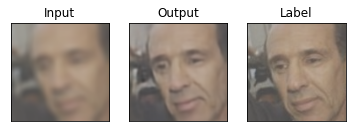

Total training loss: 0.00435873

Running Validation for epoch 0


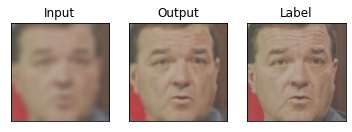

Validation Accuracy @ epoch 0 : 0.9163021589017502
Total Validation Loss @ epoch 0 : 0.000912312415323413
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 1


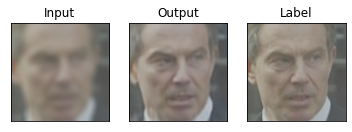

Total training loss: 0.00408108

Running Validation for epoch 1


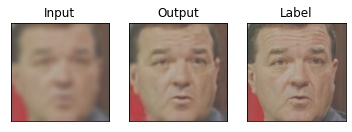

Validation Accuracy @ epoch 1 : 0.9251894592121269
Total Validation Loss @ epoch 1 : 0.00045251969903858935
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 2


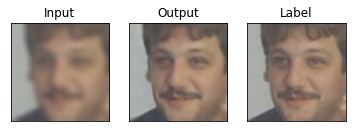

Total training loss: 0.00401268

Running Validation for epoch 2


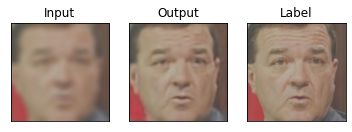

Validation Accuracy @ epoch 2 : 0.9197730159462614
Total Validation Loss @ epoch 2 : 0.0012252430102108747
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 3


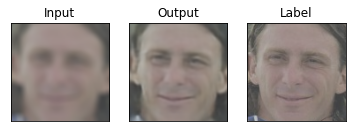

Total training loss: 0.00398673

Running Validation for epoch 3


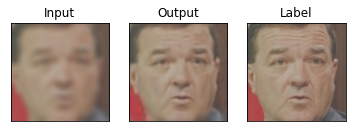

Validation Accuracy @ epoch 3 : 0.9263562699127694
Total Validation Loss @ epoch 3 : 0.0007416859481850224
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 4


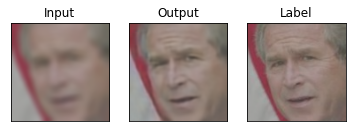

Total training loss: 0.00390225

Running Validation for epoch 4


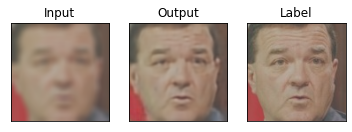

Validation Accuracy @ epoch 4 : 0.9179176134016628
Total Validation Loss @ epoch 4 : 0.0019502927694787786
-------------------- EPOCH COMPLETE --------------------


In [ ]:
# Reducing lr to 1e-4
optimizer = Adam(net.parameters(), lr=1e-4)
train(5)


Training @ epoch 0


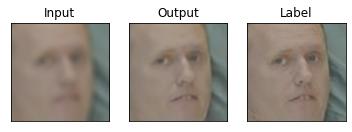

Total training loss: 0.00387335

Running Validation for epoch 0


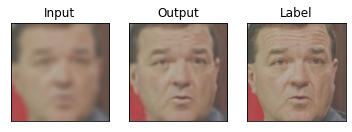

Validation Accuracy @ epoch 0 : 0.9222973662438373
Total Validation Loss @ epoch 0 : 0.0012969966359861473
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 1


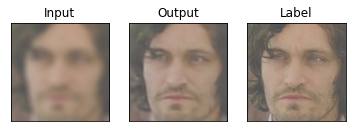

Total training loss: 0.00374998

Running Validation for epoch 1


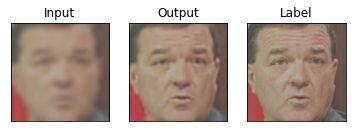

Validation Accuracy @ epoch 1 : 0.9231753287454387
Total Validation Loss @ epoch 1 : 0.0006995607660797987
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 2


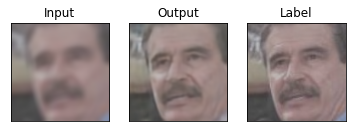

Total training loss: 0.00376143

Running Validation for epoch 2


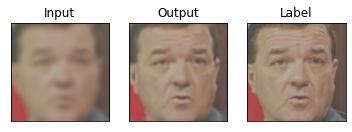

Validation Accuracy @ epoch 2 : 0.9205272097229329
Total Validation Loss @ epoch 2 : 0.001359502931705947
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 3


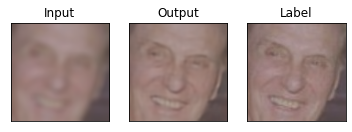

Total training loss: 0.00371608

Running Validation for epoch 3


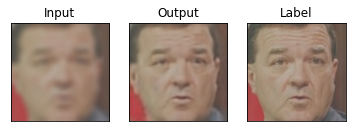

Validation Accuracy @ epoch 3 : 0.9273077994755987
Total Validation Loss @ epoch 3 : 0.0008779686877176118
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 4


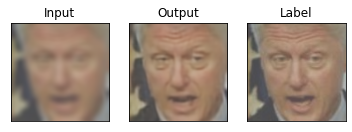

Total training loss: 0.00373754

Running Validation for epoch 4


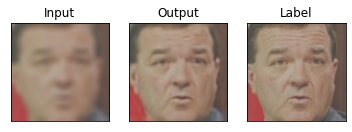

Validation Accuracy @ epoch 4 : 0.9156150476153375
Total Validation Loss @ epoch 4 : 0.005195902651294659
-------------------- EPOCH COMPLETE --------------------


In [ ]:
train(5) # Reduced BS to 4 from 8

# Evaluation
- Assessing the model's performance on train and validation sets

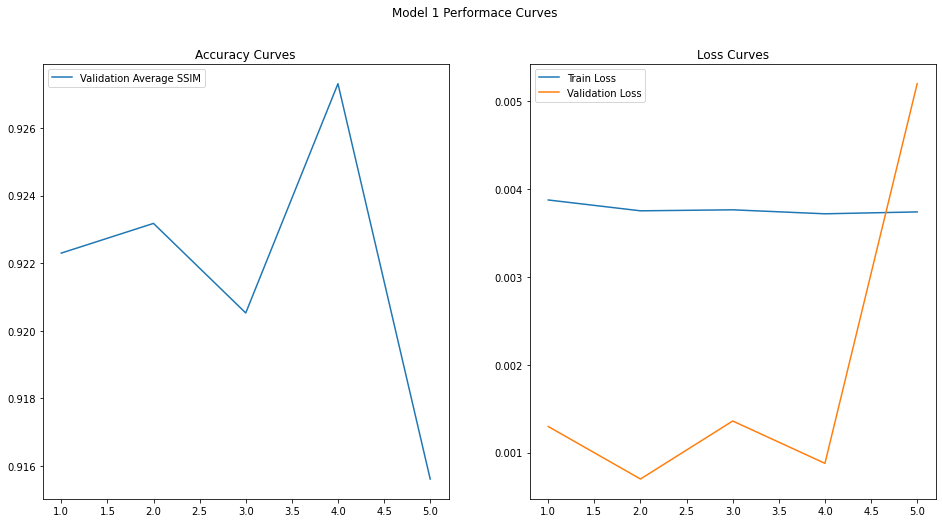

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax, cx = fig.subplots(1, 2)

ax.set_title("Accuracy Curves")
# ax.plot(range(1,len(fit_accuracy)+1), fit_accuracy)
ax.plot(range(1,len(val_acc_per_epoch)+1), val_acc_per_epoch)
ax.legend(['Validation Average SSIM'])

cx.set_title("Loss Curves")
cx.plot(range(1,len(loss_per_epoch)+1), loss_per_epoch[:])
cx.plot(range(1,len(val_loss_per_epoch)+1), val_loss_per_epoch[:])
cx.legend(['Train Loss', 'Validation Loss'])

plt.suptitle("Model 1 Performace Curves")

plt.show()

Epoch 0


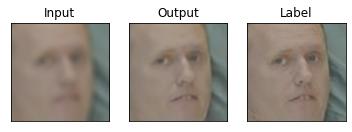

Epoch 1


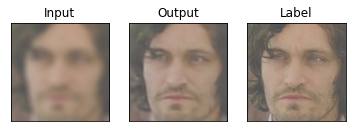

Epoch 2


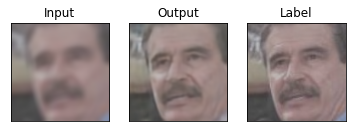

Epoch 3


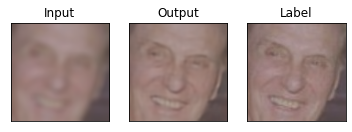

Epoch 4


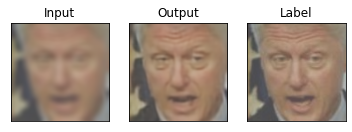

In [ ]:
show_progression(train_log[:], 5)

# Testing Phase
 - Running the model on the test set

Running on Test Set


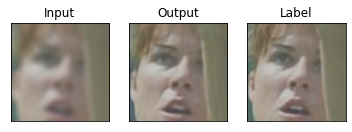

Test Accuracy : 0.9160434574932655
Total Test Loss : 0.006468026730303222
-------------------- TESTING COMPLETE --------------------


In [ ]:
print(f"Running on Test Set")
net.eval()
eval_accuracy, nb_eval_steps, nb_eval_examples = 0.0, 0, 0
total_val_loss = 0.0
once = False
for batch in test_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_inputs, b_labels = batch
    
    with torch.no_grad():        
        outputs = net(b_inputs)

    val_loss = pixel_loss(b_labels, outputs)
    total_val_loss += val_loss.item()
    if not once:
        display_something(b_inputs[0], outputs[0], b_labels[0])
        once = True
    
    outputs = outputs.detach().cpu().numpy()
    labels = b_labels.cpu().numpy()

    temp_eval_accuracy = 0.0
    for y1, y2 in zip(outputs, labels):
        mssim = structural_similarity(np.moveaxis(y1,0,-1).astype(np.float32), np.moveaxis(y2,0,-1).astype(np.float32), multichannel=True)
        temp_eval_accuracy += mssim
    
    # Accumulate the total accuracy.
    eval_accuracy += (temp_eval_accuracy/len(outputs))
    # Track the number of batches
    nb_eval_steps += 1
print(f"Test Accuracy : {eval_accuracy/nb_eval_steps}")
print(f"Total Test Loss : {total_val_loss}")
print("-"*20,"TESTING COMPLETE", "-"*20)

# Save Results

In [ ]:
torch.save(net, "./drive/MyDrive/CS512_Project/data/Final_Model_with_Results2.h5")
np.savez("./drive/MyDrive/CS512_Project/data/log_dumps2.npz",train_log=train_log, val_acc_per_epoch=val_acc_per_epoch, val_loss_per_epoch=val_loss_per_epoch, loss_per_epoch=loss_per_epoch)

# Archives
- Some previous good runs and results

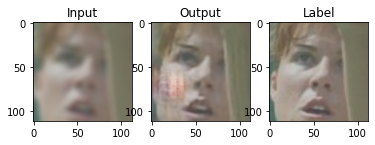

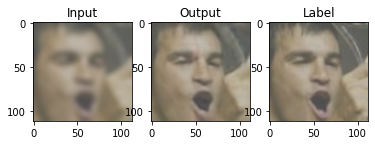

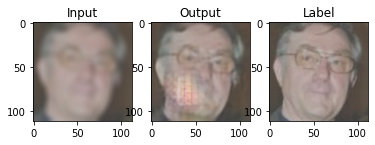

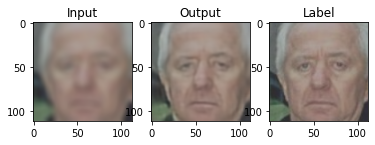

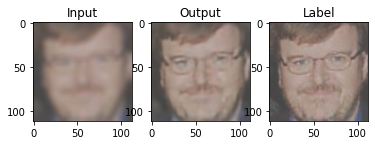

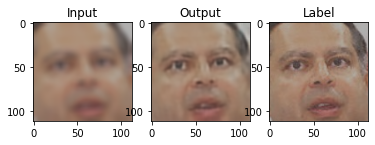

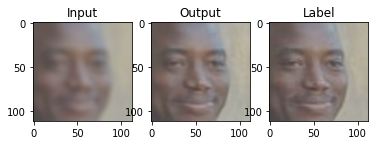

KeyboardInterrupt: ignored

In [ ]:
# Older Model
net.eval()
eval_accuracy, nb_eval_steps, nb_eval_examples = 0, 0, 0

for batch in test_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_inputs, b_labels = batch
    
    with torch.no_grad():        
        outputs = net(b_inputs)

    display_something(b_inputs[0], outputs[0], b_labels[0])

    outputs = outputs.detach().cpu().numpy()
    labels = b_labels.cpu().numpy()

    

    temp_eval_accuracy = 0
    for y1, y2 in zip(outputs, labels):
        mssim = structural_similarity(np.moveaxis(y1,0,-1).astype(np.float32), np.moveaxis(y2,0,-1).astype(np.float32), multichannel=True)
        temp_eval_accuracy += mssim
    
    # Accumulate the total accuracy.
    eval_accuracy += (temp_eval_accuracy/len(outputs))
    # Track the number of batches
    nb_eval_steps += 1
print(f"Validation Accuracy @ epoch {i} : {0:.4f}".format(eval_accuracy/nb_eval_steps))
print("-"*20,"EPOCH COMPLETE", "-"*20)

## Best Runs


Training @ epoch 0


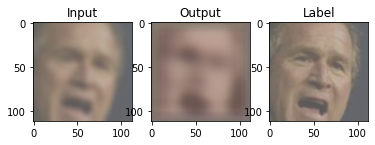

Total training loss: 0.00014897

Running Validation for epoch 20
Validation Accuracy @ epoch 0 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 1


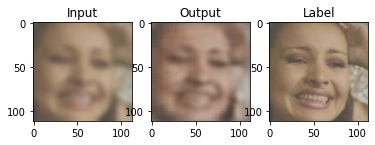

Total training loss: 0.00002753

Running Validation for epoch 20
Validation Accuracy @ epoch 1 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 2


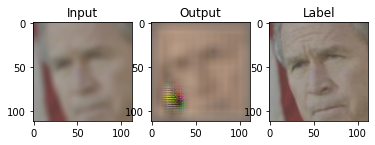

Total training loss: 0.00003790

Running Validation for epoch 20
Validation Accuracy @ epoch 2 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 3


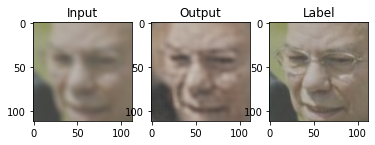

Total training loss: 0.00001573

Running Validation for epoch 20
Validation Accuracy @ epoch 3 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 4


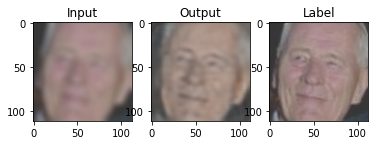

Total training loss: 0.00001179

Running Validation for epoch 20
Validation Accuracy @ epoch 4 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 5


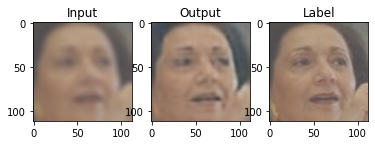

Total training loss: 0.00000914

Running Validation for epoch 20
Validation Accuracy @ epoch 5 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 6


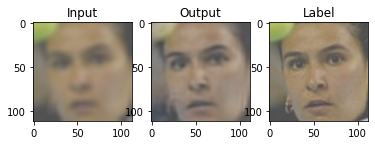

Total training loss: 0.00000671

Running Validation for epoch 20
Validation Accuracy @ epoch 6 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 7


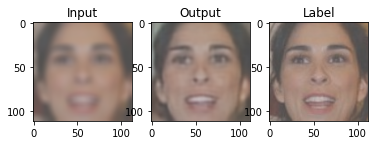

Total training loss: 0.00000684

Running Validation for epoch 20
Validation Accuracy @ epoch 7 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 8


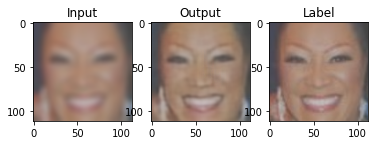

Total training loss: 0.00000510

Running Validation for epoch 20
Validation Accuracy @ epoch 8 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 9


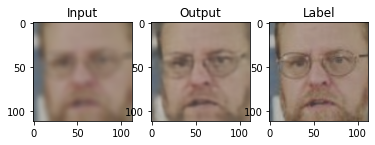

Total training loss: 0.00000434

Running Validation for epoch 20
Validation Accuracy @ epoch 9 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 10


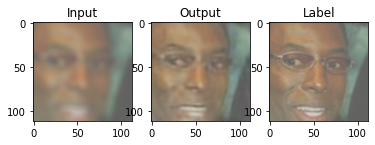

Total training loss: 0.00000388

Running Validation for epoch 20
Validation Accuracy @ epoch 10 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 11


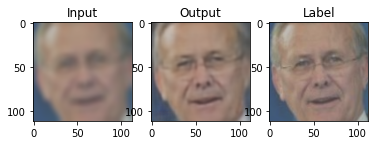

Total training loss: 0.00000362

Running Validation for epoch 20
Validation Accuracy @ epoch 11 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 12


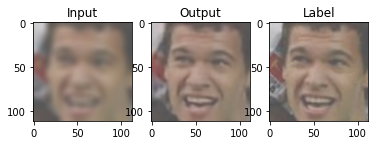

Total training loss: 0.00000319

Running Validation for epoch 20
Validation Accuracy @ epoch 12 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 13


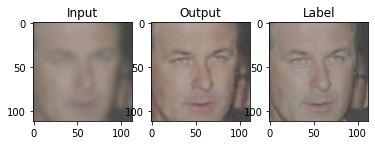

Total training loss: 0.00000343

Running Validation for epoch 20
Validation Accuracy @ epoch 13 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 14


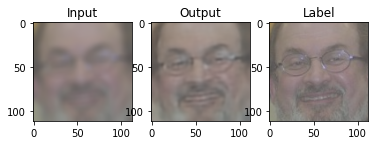

Total training loss: 0.00000280

Running Validation for epoch 20
Validation Accuracy @ epoch 14 : 0.0000
-------------------- EPOCH COMPLETE --------------------

Training @ epoch 15


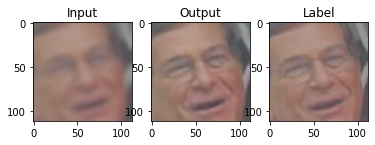

KeyboardInterrupt: ignored

In [ ]:
train(20)


Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


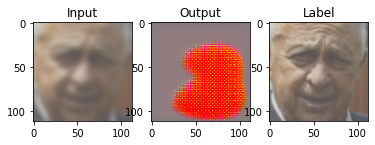


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.49

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


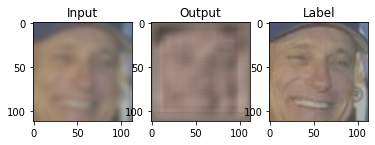


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.53

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


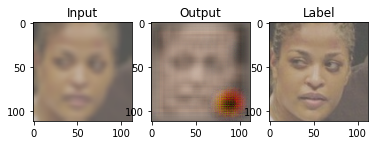


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.57

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


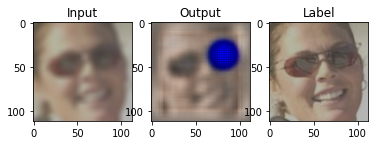


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.60

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


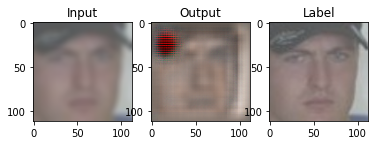


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.62

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


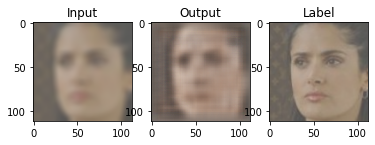


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.62

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


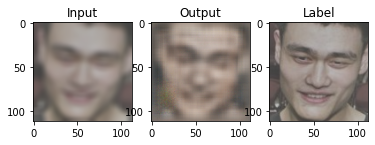


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.64

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


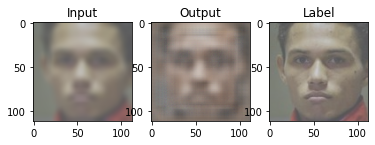


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.65

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


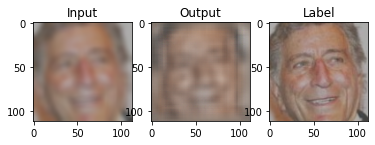


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.66

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


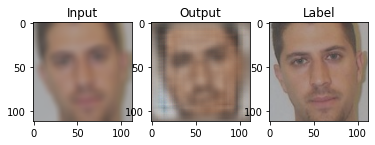


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.65

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


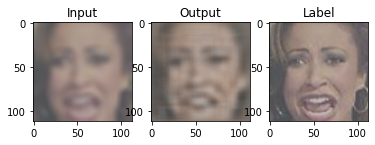


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.67

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


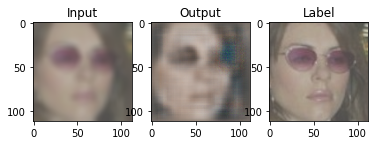


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.68

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


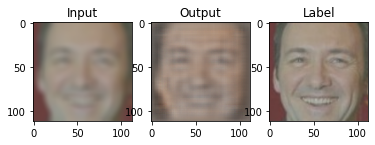


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.69

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


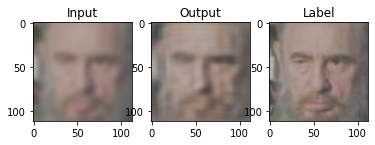


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.68

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


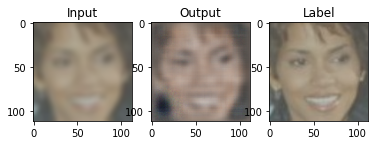


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.69

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


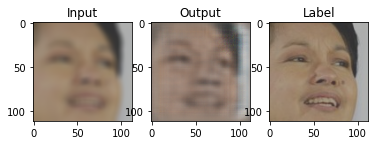


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.69

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


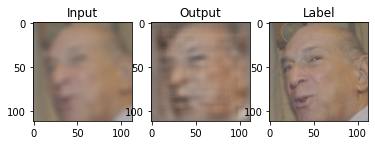


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.71

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


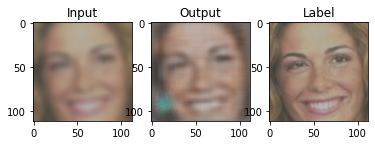


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.71

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


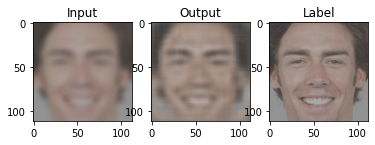


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.70

Running Training...
torch.Size([3, 112, 112]) torch.Size([3, 112, 112]) torch.Size([3, 112, 112])


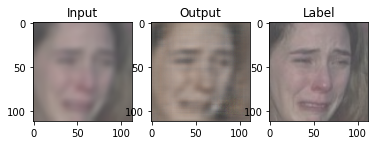


  Average training loss: 0.00

Running Validation...
  Accuracy: 0.70


In [ ]:
train(20)